In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

**Dataset**

In [ ]:
df2 = pd.read_csv("Cyber Security Breaches.csv")

In [ ]:
df2.head()

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        1055 non-null   int64 
 1   Number                            1055 non-null   int64 
 2   Name_of_Covered_Entity            1055 non-null   object
 3   State                             1055 non-null   object
 4   Business_Associate_Involved       271 non-null    object
 5   Individuals_Affected              1055 non-null   int64 
 6   Date_of_Breach                    1055 non-null   object
 7   Type_of_Breach                    1055 non-null   object
 8   Location_of_Breached_Information  1055 non-null   object
 9   Date_Posted_or_Updated            1055 non-null   object
 10  Summary                           142 non-null    object
 11  breach_start                      1055 non-null   object
 12  breach_end          

In [ ]:
df2["Location_of_Breached_Information"].nunique()

41

In [ ]:
df2[""]

In [ ]:
df2

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,1051,1050,Puerto Rico Health Insurance,PR,American Health Inc,28413,9/20/2013,Theft,Other,2014-06-27,NaN,2013-09-20,NaN,2013
1051,1052,1051,"Hospitalists of Brandon, LLC",FL,"Doctors First Choice Billings, Inc.",1831,2/11/2014,Hacking/IT Incident,Other,2014-06-27,NaN,2014-02-11,NaN,2014
1052,1053,1052,Santa Rosa Memorial Hospital,CA,NaN,33702,6/2/2014,"Theft, Loss",Other Portable Electronic Device,2014-06-27,NaN,2014-06-02,NaN,2014
1053,1054,1053,Group Health Plan of Hurley Medical Center,MI,NaN,2289,5/13/2014,Unauthorized Access/Disclosure,E-mail,2014-06-27,NaN,2014-05-13,NaN,2014


In [ ]:
df2.columns = ['id', 'Number', 'Entity', 'State', 'Business_Associate_Involved', 'Individuals_Affected', 'Date_of_Breach',
               'Type_of_Breach', 'Location_of_Breached_Information', 'Date_Posted_or_Updated', 'Summary', 'breach_start',
               'breach_end', 'year']

In [ ]:
df2.shape

(1055, 14)

In [ ]:
df2.dtypes

id                                   int64
Number                               int64
Entity                              object
State                               object
Business_Associate_Involved         object
Individuals_Affected                 int64
Date_of_Breach                      object
Type_of_Breach                      object
Location_of_Breached_Information    object
Date_Posted_or_Updated              object
Summary                             object
breach_start                        object
breach_end                          object
year                                 int64
dtype: object

In [ ]:
df2.isnull().sum()

id                                    0
Number                                0
Entity                                0
State                                 0
Business_Associate_Involved         784
Individuals_Affected                  0
Date_of_Breach                        0
Type_of_Breach                        0
Location_of_Breached_Information      0
Date_Posted_or_Updated                0
Summary                             913
breach_start                          0
breach_end                          910
year                                  0
dtype: int64

In [ ]:
df2.head()

,id,Number,Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009


In [ ]:
df2.drop(['Number','Summary', 'Date_Posted_or_Updated', 'breach_start',
          'breach_end', 'Business_Associate_Involved'], axis=1, inplace=True)

In [ ]:
df2.head()

,id,Entity,State,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,year
0,1,Brooke Army Medical Center,TX,1000,10/16/2009,Theft,Paper,2009
1,2,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,Theft,Network Server,2009
2,3,Alaska Department of Health and Social Services,AK,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2009
3,4,Health Services for Children with Special Need...,DC,3800,10/9/2009,Loss,Laptop,2009
4,5,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,Theft,Desktop Computer,2009


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   id                                1055 non-null   int64 
 1   Entity                            1055 non-null   object
 2   State                             1055 non-null   object
 3   Individuals_Affected              1055 non-null   int64 
 4   Date_of_Breach                    1055 non-null   object
 5   Type_of_Breach                    1055 non-null   object
 6   Location_of_Breached_Information  1055 non-null   object
 7   year                              1055 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 66.1+ KB


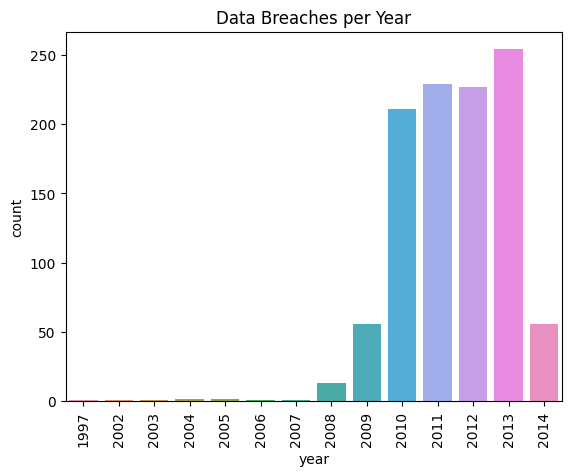

In [ ]:
sns.countplot(data=df2, x='year');
plt.title('Data Breaches per Year')
plt.xticks(rotation=90);

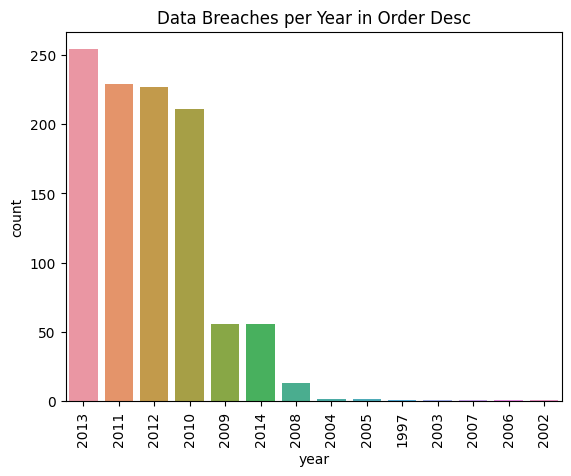

In [ ]:
sns.countplot(data=df2, x='year', order = df2['year'].value_counts().index);
plt.title('Data Breaches per Year in Order Desc')
plt.xticks(rotation=90);

In [ ]:
table_year_df2 = df2['year'].value_counts()
table_year_df2

2013    254
2011    229
2012    227
2010    211
2009     56
2014     56
2008     13
2004      2
2005      2
1997      1
2003      1
2007      1
2006      1
2002      1
Name: year, dtype: int64

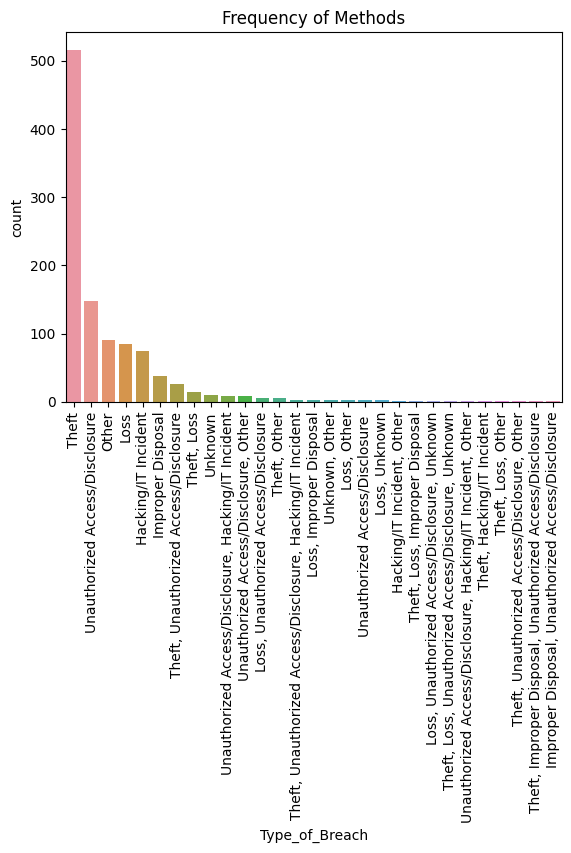

In [ ]:
sns.countplot(data=df2, x='Type_of_Breach', order = df2['Type_of_Breach'].value_counts().index);
plt.title('Frequency of Methods')
plt.xticks(rotation=90);

In [ ]:
table3 = df2['Type_of_Breach'].value_counts()
table3.head(14)

Theft                                                         516
Unauthorized Access/Disclosure                                148
Other                                                          91
Loss                                                           85
Hacking/IT Incident                                            75
Improper Disposal                                              38
Theft, Unauthorized Access/Disclosure                          26
Theft, Loss                                                    15
Unknown                                                        10
Unauthorized Access/Disclosure, Hacking/IT Incident             9
Unauthorized Access/Disclosure, Other                           8
Loss, Unauthorized Access/Disclosure                            5
Theft, Other                                                    5
Theft, Unauthorized Access/Disclosure, Hacking/IT Incident      3
Name: Type_of_Breach, dtype: int64

In [ ]:
Type_of_Breach_counts = df2['Type_of_Breach'].value_counts().rename('Type_of_Breach_counts')

df2_Type_of_Breach = df2.merge(Type_of_Breach_counts.to_frame(),
                                left_on='Type_of_Breach',
                                right_index=True)

In [ ]:
df2.head()

,id,Entity,State,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,year
0,1,Brooke Army Medical Center,TX,1000,10/16/2009,Theft,Paper,2009
1,2,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,Theft,Network Server,2009
2,3,Alaska Department of Health and Social Services,AK,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2009
3,4,Health Services for Children with Special Need...,DC,3800,10/9/2009,Loss,Laptop,2009
4,5,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,Theft,Desktop Computer,2009


In [ ]:
import plotly.express as px

In [ ]:
df2_Type_of_Breach_upper = df2_Type_of_Breach[df2_Type_of_Breach.Type_of_Breach_counts > 4]

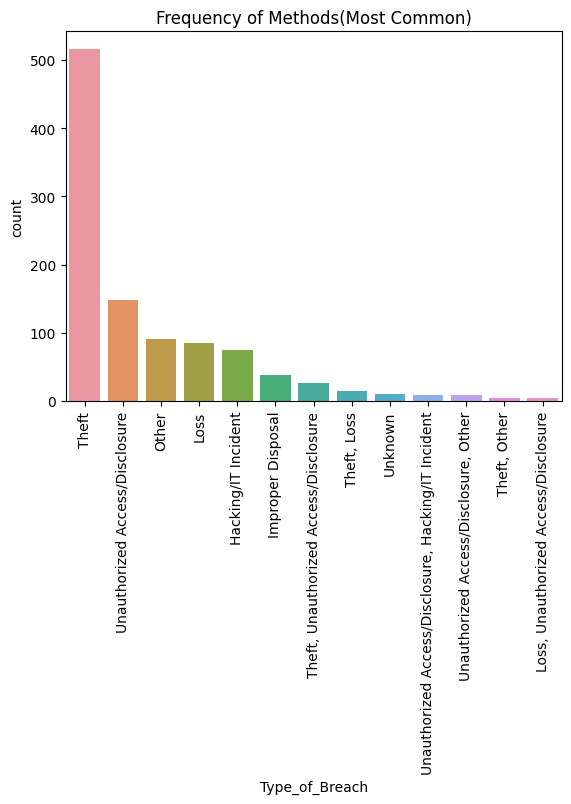

In [ ]:
sns.countplot(data=df2_Type_of_Breach_upper, x='Type_of_Breach',
              order = df2_Type_of_Breach_upper['Type_of_Breach'].value_counts().index);
plt.title('Frequency of Methods(Most Common)')
plt.xticks(rotation=90);

In [ ]:
table4 = df2['State'].value_counts()
table4

CA    113
TX     83
FL     66
NY     58
IL     49
PA     40
IN     40
OH     33
TN     32
NC     32
MA     32
PR     31
GA     30
KY     26
MI     26
MO     25
WA     25
AZ     21
MN     21
NJ     20
CO     18
VA     18
MD     18
CT     17
OR     15
WI     14
SC     13
AL     12
AR     11
NM     10
NE      9
UT      9
DC      9
IA      8
LA      7
RI      7
KS      7
OK      6
WV      5
MS      5
NV      5
AK      5
WY      4
NH      4
MT      4
DE      3
ND      3
ID      2
HI      1
SD      1
ME      1
VT      1
Name: State, dtype: int64

In [ ]:
State_counts = df2['State'].value_counts().rename('State_counts')

df2_State = df2.merge(State_counts.to_frame(),
                                left_on='State',
                                right_index=True)

In [ ]:
df2_State_upper = df2_State[df2_State.State_counts >= 15]

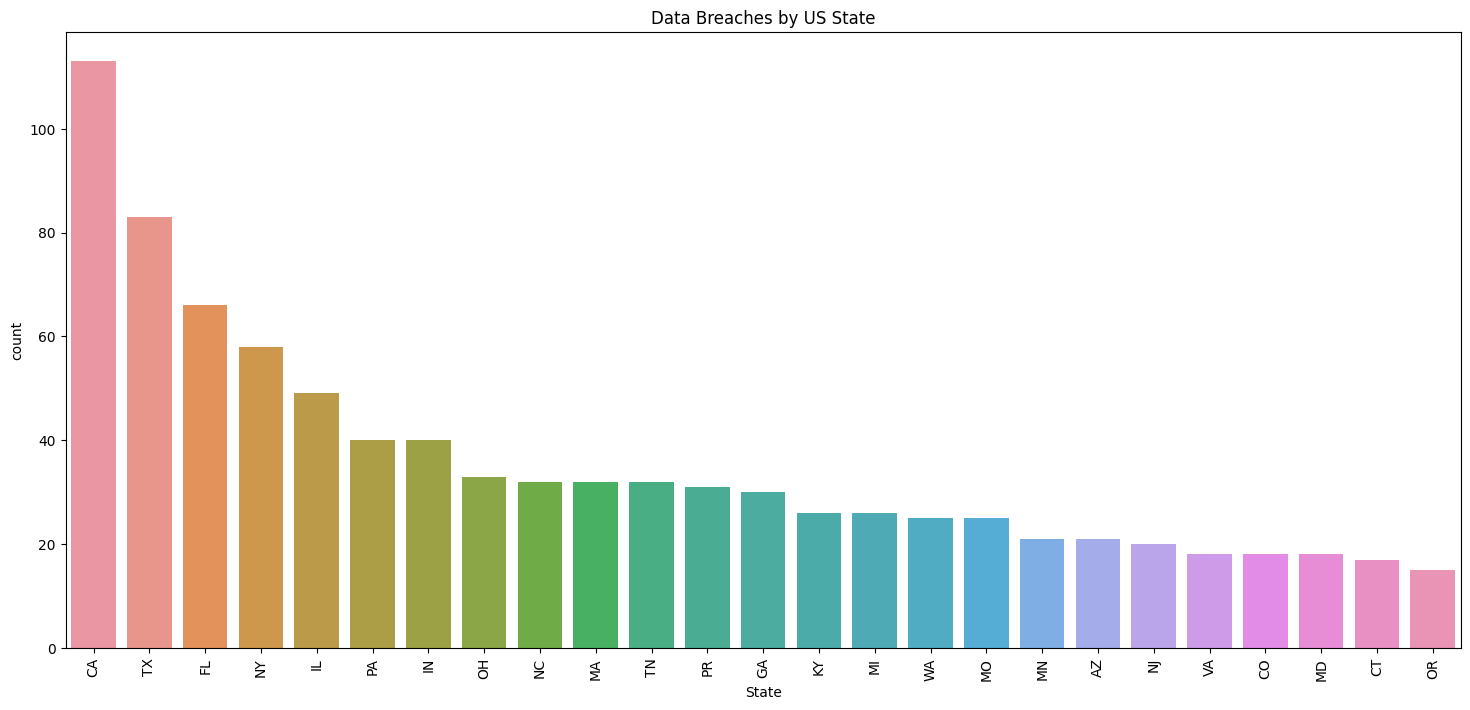

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(data=df2_State_upper, x='State', order = df2_State_upper['State'].value_counts().index);
plt.title('Data Breaches by US State')
plt.xticks(rotation=90);

In [ ]:
df2_2006 = df2.loc[df2['year']>2006]

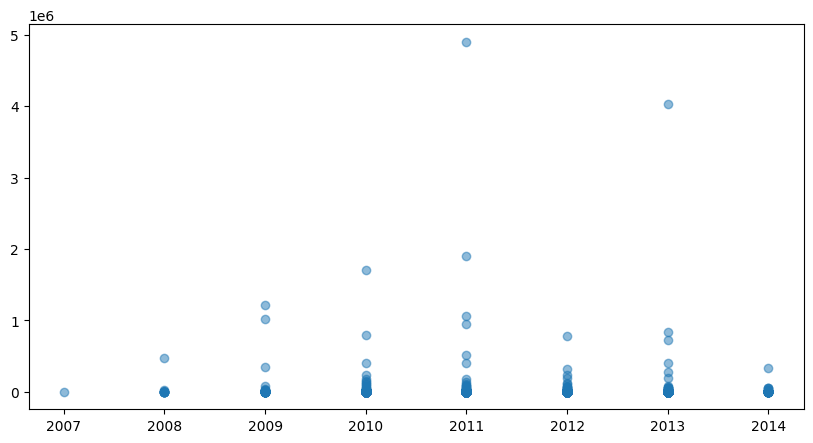

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(data = df2_2006, y = 'Individuals_Affected', x = 'year', alpha=1/2);

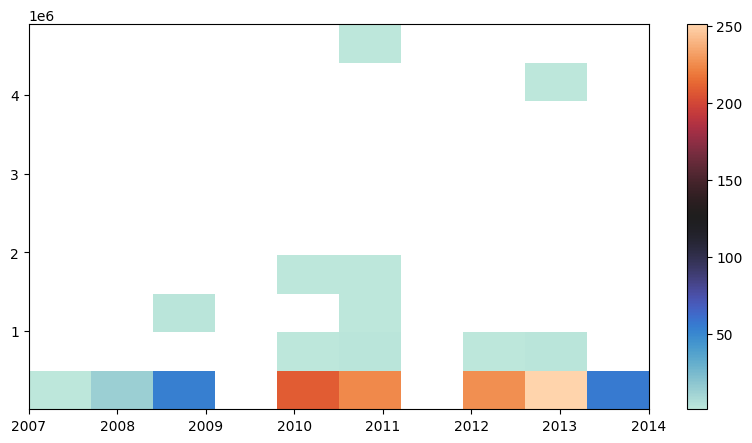

In [ ]:
plt.figure(figsize=(10,5))
plt.hist2d(data = df2_2006,  y = 'Individuals_Affected', x = 'year', cmin=0.5, cmap = 'icefire')
plt.colorbar();

In [ ]:
df2_2006_breach = df2_2006.loc[df2_2006['Type_of_Breach'].isin(df2_2006['Type_of_Breach'].value_counts().index[:11])]

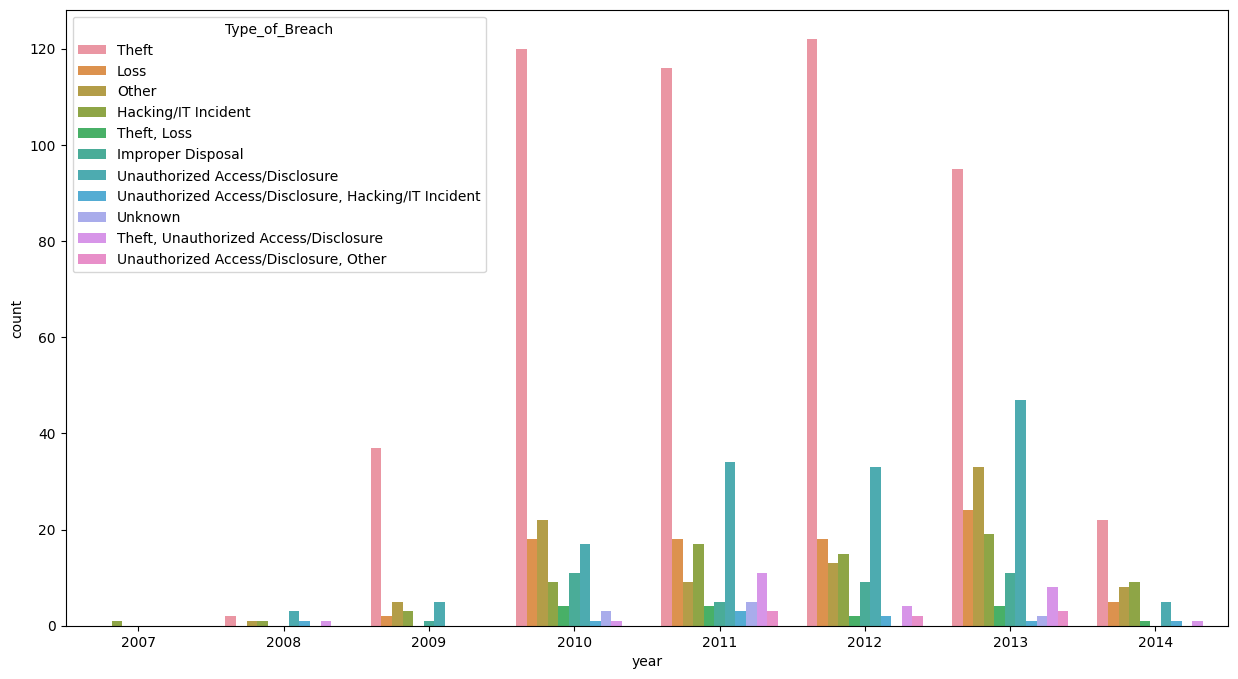

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data = df2_2006_breach, x = 'year', hue = 'Type_of_Breach');

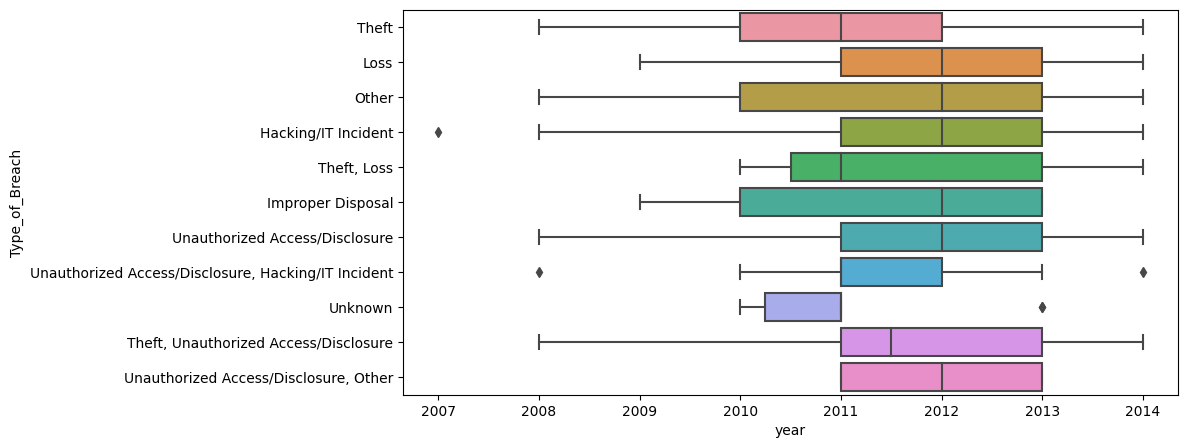

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df2_2006_breach, y = 'Type_of_Breach', x = 'year');

In [ ]:
df2_heatmap = df2.copy(deep=True)

In [ ]:
le = LabelEncoder()

df2_heatmap['State'] = le.fit_transform(df2_heatmap['State'])
df2_heatmap['Date_of_Breach'] = le.fit_transform(df2_heatmap['Date_of_Breach'])
df2_heatmap['Type_of_Breach'] = le.fit_transform(df2_heatmap['Type_of_Breach'])
df2_heatmap['Location_of_Breached_Information'] = le.fit_transform(df2_heatmap['Location_of_Breached_Information'])

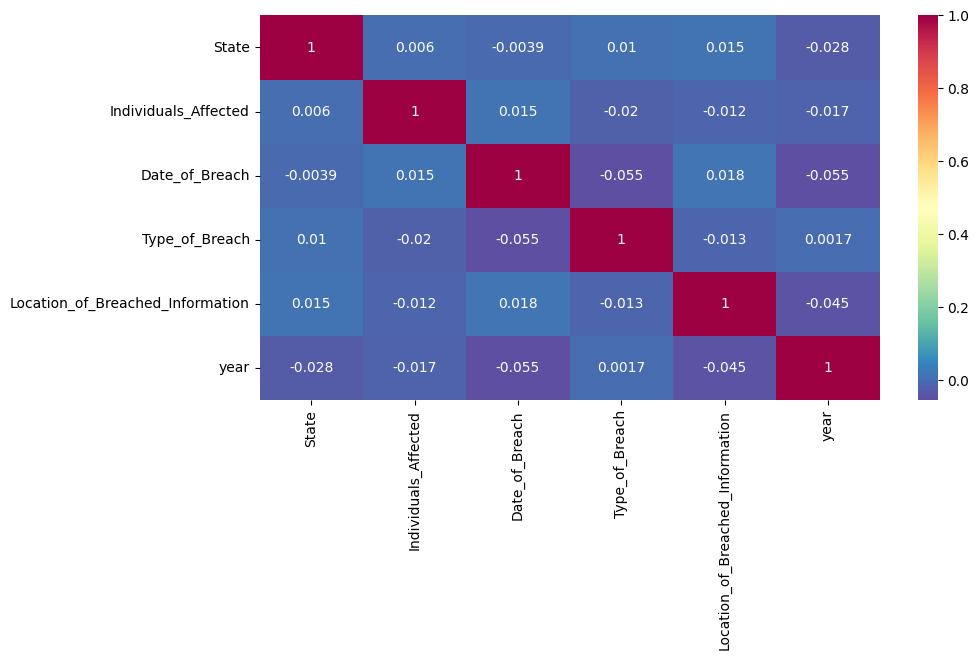

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df2_heatmap[['State', 'Individuals_Affected', 'Date_of_Breach', 'Type_of_Breach',
                 'Location_of_Breached_Information', 'year']].corr(), cmap='Spectral_r', annot=True);

### Arima Code Starts

In [ ]:
import statsmodels.api as sm


In [ ]:
df2.head()

,id,Entity,State,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,year
0,1,Brooke Army Medical Center,TX,1000,10/16/2009,Theft,Paper,2009
1,2,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,Theft,Network Server,2009
2,3,Alaska Department of Health and Social Services,AK,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2009
3,4,Health Services for Children with Special Need...,DC,3800,10/9/2009,Loss,Laptop,2009
4,5,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,Theft,Desktop Computer,2009


In [ ]:
# df2 = df_train.apply(pd.to_numeric,downcast="float")
df2["Individuals_Affected"] = pd.to_numeric(df2["Individuals_Affected"])

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df2.year.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.181411
p-value: 0.213061


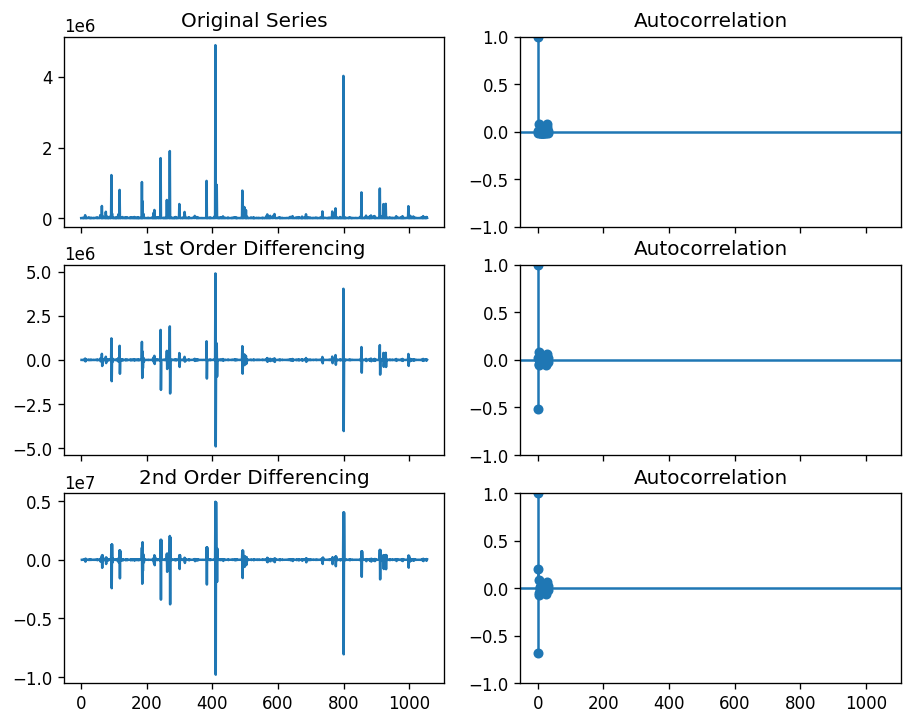

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df2.Individuals_Affected); axes[0, 0].set_title('Original Series')
plot_acf(df2.Individuals_Affected, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df2.Individuals_Affected.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df2.Individuals_Affected.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df2.Individuals_Affected.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df2.Individuals_Affected.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

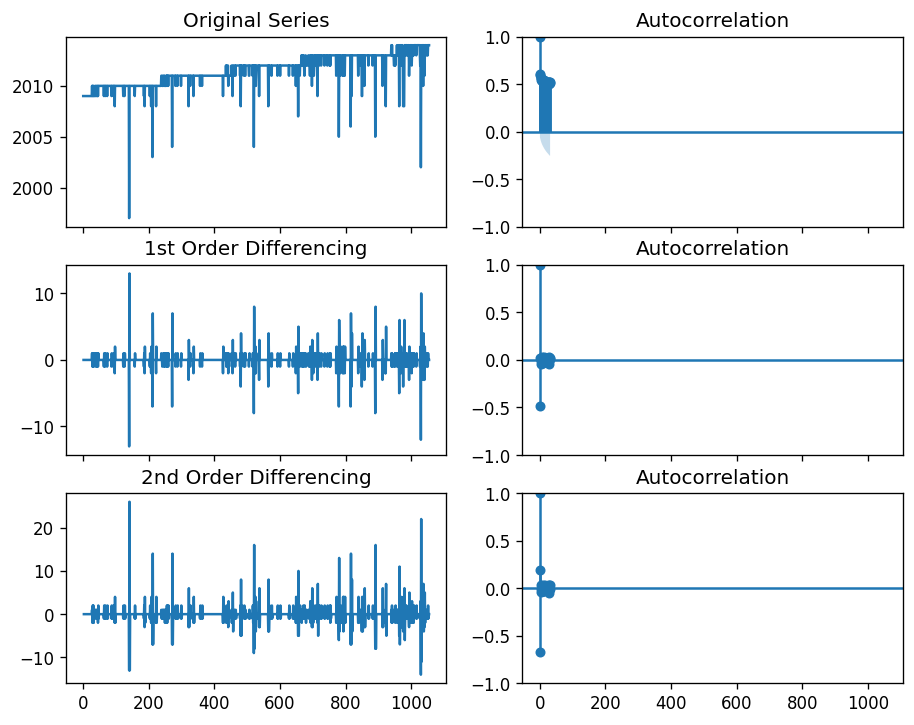

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df2.year); axes[0, 0].set_title('Original Series')
plot_acf(df2.year, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df2.year.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df2.year.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df2.year.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df2.year.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

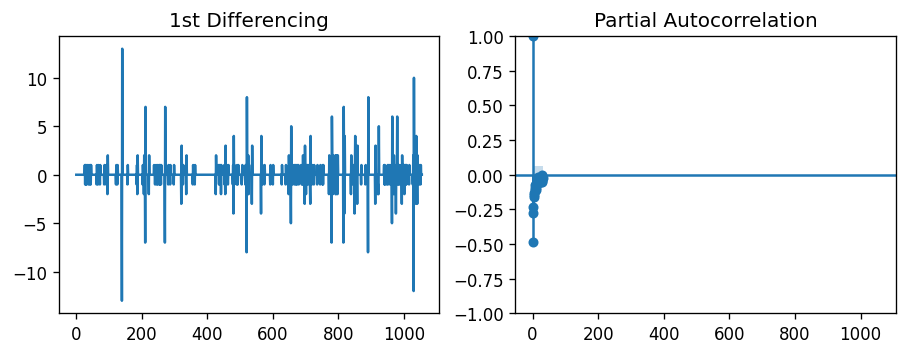

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df2.year.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df2.year.diff().dropna(), ax=axes[1])

plt.show()

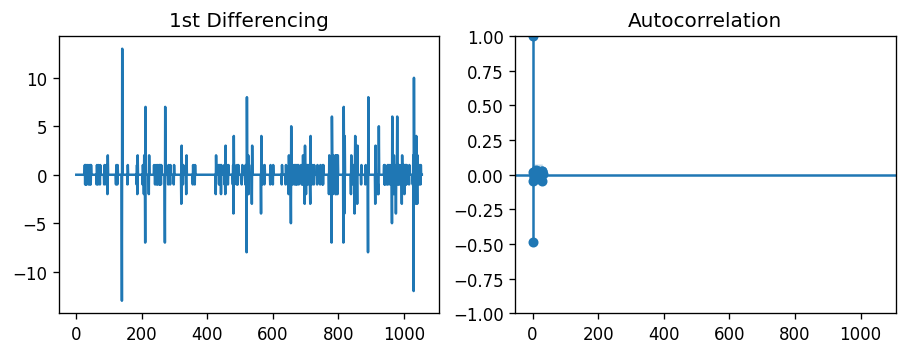

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df2.year.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df2.year.diff().dropna(), ax=axes[1])

plt.show()

In [8]:
# pip install statsmodels

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


data = pd.read_csv('Cyber Security Breaches.csv')


data.head()

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009


In [ ]:
date_column = 'Date_Posted_or_Updated'
value_column = 'Individuals_Affected'


# Run only once
data[date_column] = pd.to_datetime(data[date_column])

# Run only once
data.set_index(date_column, inplace=True)

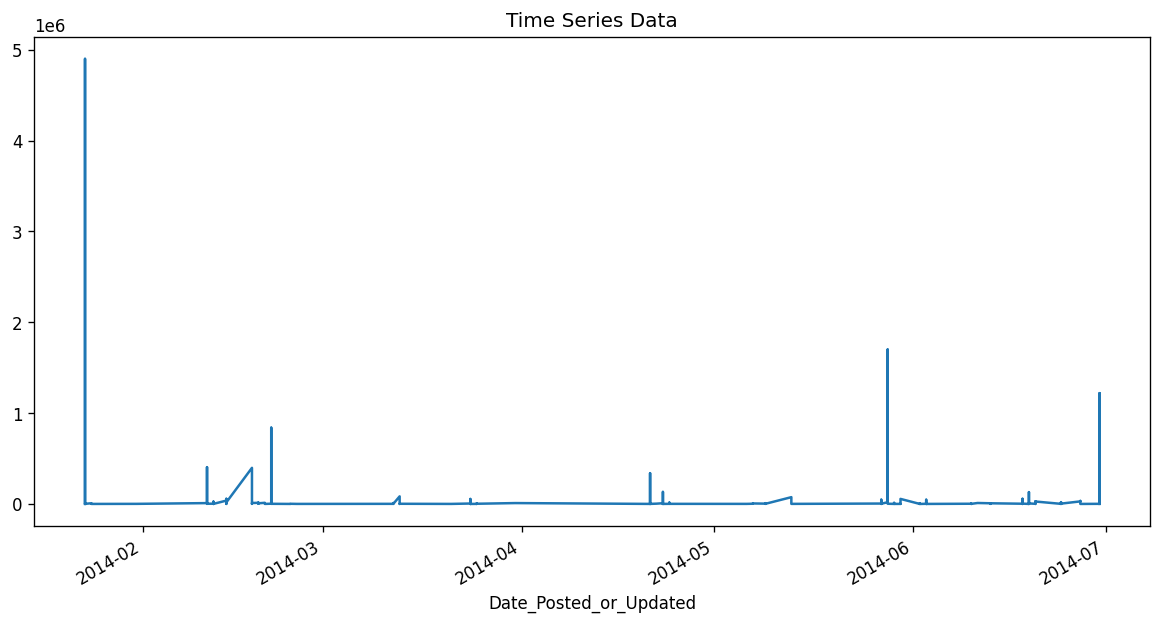

In [ ]:
data[value_column].plot(figsize=(12, 6))
plt.title('Time Series Data')
plt.show()

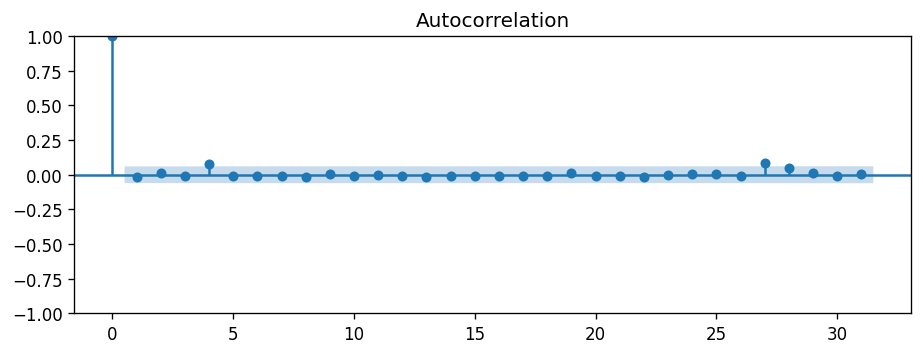

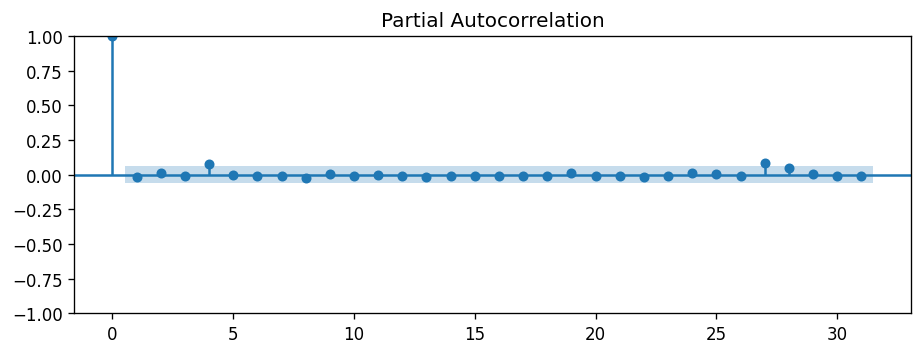

In [ ]:
plot_acf(data[value_column]) # Auto Correlation
plot_pacf(data[value_column]) # Partial Auto Correlation
plt.show()

In [ ]:
# Determine ARIMA parameters (p, d, q)
# Adjust the order based on the ACF and PACF plots
p = 1  # AR (AutoRegressive) order
d = 1  # I (Integrated) order
q = 1  # MA (Moving Average) order

In [ ]:
# Fit the ARIMA model
model = ARIMA(data[value_column], order=(p, d, q))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
# Display model summary
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:     Individuals_Affected   No. Observations:                 1055
Model:                   ARIMA(1, 1, 1)   Log Likelihood              -14510.821
Date:                  Sat, 02 Dec 2023   AIC                          29027.643
Time:                          11:17:51   BIC                          29042.524
Sample:                               0   HQIC                         29033.284
                                 - 1055                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0134      0.333     -0.040      0.968      -0.665       0.638
ma.L1         -0.9986      0.006   -178.055      0.000      -1.010      -0.988
sigma2      6.323e+10   7.48e-11   8

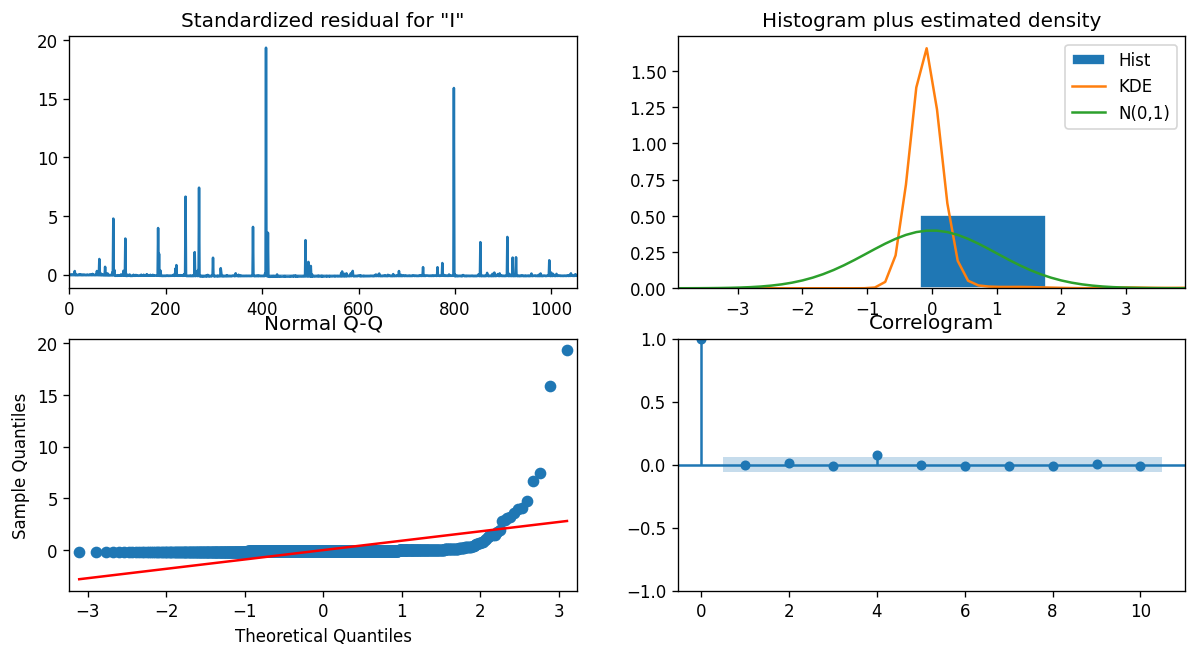

In [ ]:
# Plot the residuals
results.plot_diagnostics(figsize=(12, 6))
plt.show()

In [ ]:
# Make predictions
forecast_steps = 10  # Adjust the number of steps to forecast
forecast = results.get_forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Plot the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[value_column], label='Observed')

In [ ]:
#plt.plot(forecast.index, forecast.predicted_mean, color='red', label='Forecast')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


In [ ]:
data[value_column]

0        1000
1        1000
2         501
3        3800
4        5257
        ...  
1050    28413
1051     1831
1052    33702
1053     2289
1054     5471
Name: Individuals_Affected, Length: 1055, dtype: int64

In [ ]:
dat = forecast[:10]
dat

1055    28904.329847
1056    28591.207799
1057    28595.391814
1058    28595.335906
1059    28595.336653
1060    28595.336643
1061    28595.336643
1062    28595.336643
1063    28595.336643
1064    28595.336643
Name: predicted_mean, dtype: float64

In [ ]:
forecast = dat

In [ ]:
test_data = data[value_column]

test_data = test_data[:10]

In [ ]:

mae = mean_absolute_error(test_data, forecast[:len(test_data)])
rmse = sqrt(mean_squared_error(test_data, forecast[:len(test_data)]))


In [ ]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 25568.02852363931
Root Mean Squared Error (RMSE): 25671.593212503718
